### Pre-generate the images used in the Triangle Completion Task

In [1]:
import json
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def hide_spines_and_ticks(ax):
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis=u'both', which=u'both',length=1)
    ax.set_xticks([])
    ax.set_yticks([])
    
def isosceles_triangle_model(base_len, base_angle):
    # returns a dictionary of all relevant params to the input params
    side_len = (base_len/2) / np.cos(np.deg2rad(base_angle))
    height = side_len * np.sin(np.deg2rad(base_angle))
    L_coord = (0.5 - base_len / 2, 0)
    R_coord = (0.5 + base_len / 2, 0)
    T_coord = (0.5, height)
    
    return{'base_len':base_len, 
           'side_len':side_len, 
           'height':height,
           'base_angle':base_angle,
           'L_coord':L_coord,
           'R_coord':R_coord,
           'T_coord':T_coord}

def draw_line(ax, p1, p2, **kwargs):
    # draws a line between p1 and p2
    ax.plot([p1[0],p2[0]], [p1[1],p2[1]], **kwargs)

def draw_complete_triangle(ax, config, **kwargs):
    # for test purporses
    draw_line(ax, config['L_coord'], config['R_coord'], **kwargs)
    draw_line(ax, config['L_coord'], config['T_coord'], **kwargs)
    draw_line(ax, config['R_coord'], config['T_coord'], **kwargs)
    return ax

def draw_task_triangle_propotional_seg(ax, config, base_p=1/7, side_p=1/5, **kwargs):
    # draw incomplete triangles used in the task
    draw_line(ax, config['L_coord'], [config['L_coord'][0]+config['base_len']*base_p, config['L_coord'][1]], **kwargs)
    draw_line(ax, config['L_coord'], [config['L_coord'][i]+(config['T_coord'][i]-config['L_coord'][i])*side_p for i in [0,1]], **kwargs)
    draw_line(ax, config['R_coord'], [config['R_coord'][0]-config['base_len']*base_p, config['R_coord'][1]], **kwargs)
    draw_line(ax, config['R_coord'], [config['R_coord'][i]-(config['R_coord'][i]-config['T_coord'][i])*side_p for i in [0,1]], **kwargs)
    return ax

In [3]:
def draw_task_triangle_fixed_seg(ax, config, base_seg=1/25, side_seg=1/25, **kwargs):
    # draw incomplete triangles used in the task
    draw_line(ax, config['L_coord'], [config['L_coord'][0]+base_seg, config['L_coord'][1]], **kwargs)
    draw_line(ax, config['R_coord'], [config['R_coord'][0]-base_seg, config['R_coord'][1]], **kwargs)
    
    move_x = side_seg * np.cos(np.deg2rad(config['base_angle']))
    move_y = side_seg * np.sin(np.deg2rad(config['base_angle']))
    draw_line(ax, config['L_coord'], [config['L_coord'][0]+move_x, config['L_coord'][1]+move_y], **kwargs)
    draw_line(ax, config['R_coord'], [config['R_coord'][0]-move_x, config['L_coord'][1]+move_y], **kwargs)
    return ax

In [5]:
config = isosceles_triangle_model(base_len=1, base_angle=66)
print(config)

{'base_len': 1, 'side_len': 1.2292966677871193, 'height': 1.1230183869521082, 'base_angle': 66, 'L_coord': (0.0, 0), 'R_coord': (1.0, 0), 'T_coord': (0.5, 1.1230183869521082)}


In [8]:
900/1350 - 2/3

0.0

#### draw a presentation figure based on final data collected

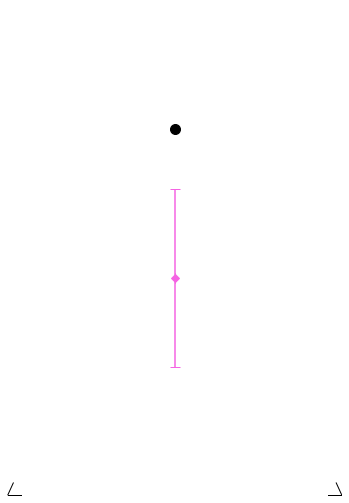

In [6]:
config = isosceles_triangle_model(base_len=1, base_angle=66)

fig, ax = plt.subplots(figsize=[6, 9]) # image size 2:3
ax.set_axis_off()
ax.set_xlim([-0.002, 1+0.001])
ax.set_ylim([-0.003, 1.5])
hide_spines_and_ticks(ax)

ax = draw_task_triangle_fixed_seg(ax, config, c='k', lw=1)

# ground-truth top vertex

# subject's mean estimated top vertex
meanDelta = -0.457367129
ax.plot(config['T_coord'][0], config['T_coord'][1], 'o', color='black', ms=10)
ax.errorbar(x=config['T_coord'][0], y=config['T_coord'][1]+meanDelta, xerr=0, yerr=0.27381352, 
            fmt='D', capsize=5, color='#F564E3')

# fig.savefig('../code/plot/presentation.png', bbox_inches='tight', pad_inches=0, dpi=250)

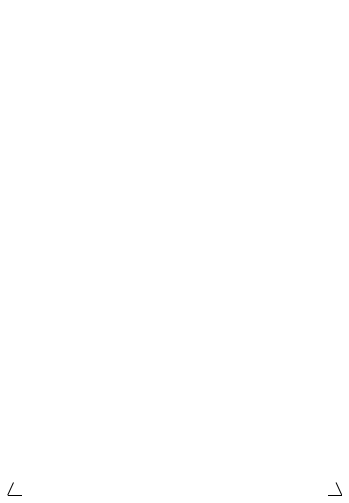

In [18]:
# test block
# test out the x/ylim offset to place the line exactly at (0,0) of the output image
fig, ax = plt.subplots(figsize=[6, 9]) # image size 2:3
ax.set_axis_off()
ax.set_xlim([-0.002, 1+0.001])
ax.set_ylim([-0.003, 1.5])
hide_spines_and_ticks(ax)

# draw_complete_triangle(ax, config, c='C1', lw=1)
draw_task_triangle_fixed_seg(ax, config, c='k', lw=1)

fig.savefig('../images/test.png', bbox_inches='tight', pad_inches=0, dpi=250)

#### generate task images and save them

In [98]:
# define triangle config params (2 groups)

g1_angles = [30, 45, 60]
g2_angles = [36, 51, 66]
base_lengths = [0.1, 0.25, 0.5, 0.75, 1]

<p> practice image

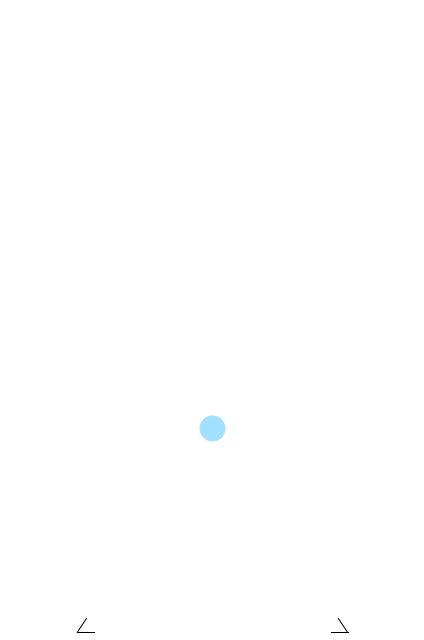

In [8]:
config = isosceles_triangle_model(.66, 56)

fig, ax = plt.subplots(figsize=[6, 9]) # image size 2:3
ax.set_axis_off()
ax.set_xlim([-0.001, 1+0.001])
ax.set_ylim([-0.001, 1.5])
hide_spines_and_ticks(ax)

draw_task_triangle_fixed_seg(ax, config, c='k', lw=1)
ax.plot([config['T_coord'][0]], [config['T_coord'][1]], 'o', c='#a1e1ff', ms=25) # draw a circle at the top vertex
fig.tight_layout()
# fig.savefig('../images/practice.png', bbox_inches='tight', pad_inches=0, dpi=250)

# save practice triangle config params
with open('../images/image_params_practice.json', 'w') as fp:
#     json.dump(config, fp)

<p> task images

In [157]:
image_params = {}

key = 'group2'
if key == 'group1':
    configs = [isosceles_triangle_model(pair[0], pair[1]) for pair in list(itertools.product(base_lengths, g1_angles))]
elif key == 'group2':
    configs = [isosceles_triangle_model(pair[0], pair[1]) for pair in list(itertools.product(base_lengths, g2_angles))]

for i, config in enumerate(configs):
    fig, ax = plt.subplots(figsize=[6, 9]) # image size 2:3
    ax.set_axis_off()
    ax.set_xlim([-0.001, 1+0.001])
    ax.set_ylim([-0.001, 1.5])
    hide_spines_and_ticks(ax)
    draw_task_triangle_fixed_seg(ax, config, c='k', lw=1)
    fig.tight_layout()
    image_params[i] = config
    fig.savefig('../images/%s_%d.png'%(key, i), bbox_inches='tight', pad_inches=0, dpi=250)
    plt.close()

# save triangle config params
with open('../images/image_params_%s.json'%key, 'w') as fp:
    json.dump(image_params, fp)